In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [2]:
import os
import random


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

---

In [3]:
df_train = pd.read_csv('../data/original/train.csv')

In [4]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


# NAN 값 처리방법

In [5]:
df_train.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

## forward fill
    - 누락된 값이 나타나기 직전의 값으로 누란된 값을 채우는 가장 간단한 방법
    - 장점
            1. 계산이 복잡하지 않다.
            2. 실시간 스트리밍 데이터에 쉽게 적용할 수 있다.
            3, 대치 작업을 능숙하게 처리할 수 있다.

## 이동평균
    - 최근 과거의 여러 시간대를 입력한 내용을 사용
    - 사용하는 경우
        1. 전체 평균에 관한 개별 데이터값을 의심할 만한 이유가 있을 때
    - 사전관찰을 방지하려면 누락이 발생되기 전의 데이터만 사용해야 한다.

## 보간법
    - 전체 데이터를 기하학적인 행동에 제한하여 누락된 데이터값을 결정하는 방법
    - 선형 보간법 : 누락된 데이터가 주변 데이터에 선형적인 일관성을 갖도록 제한
        - 적절하지 않은 예)
            - 강수량은 선형적인 추세로 움직이지 않아서 특정 날짜 사이의 강수량을 선형적으로 추정해서는 안된다.

# 일시

In [6]:
df_train['일시']

0        1960-01-01
1        1960-01-02
2        1960-01-03
3        1960-01-04
4        1960-01-05
            ...    
23006    2022-12-27
23007    2022-12-28
23008    2022-12-29
23009    2022-12-30
23010    2022-12-31
Name: 일시, Length: 23011, dtype: object

# 최고기온
    - 그래프로 앞 뒤 확인 후 선형 보간법으로 NAN값 처리

In [7]:
df_train[df_train['최고기온'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2606,1967-02-19,NaN,NaN,NaN,NaN,62.0,1.8,9.5,NaN,93.1,-1.7
5037,1973-10-16,NaN,NaN,NaN,0.4,74.0,1.8,3.5,9.24,29.7,12.3
21104,2017-10-12,NaN,8.8,NaN,NaN,71.0,2.0,NaN,2.23,0.0,11.4


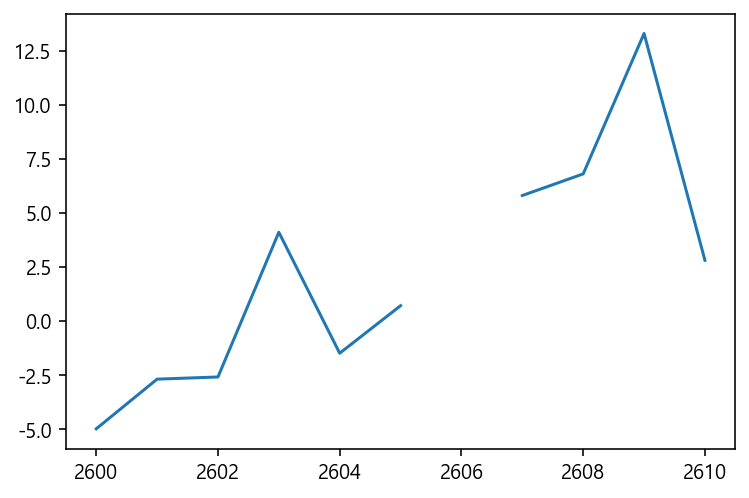

In [8]:
plt.plot(df_train.loc[2600:2610, '최고기온'])

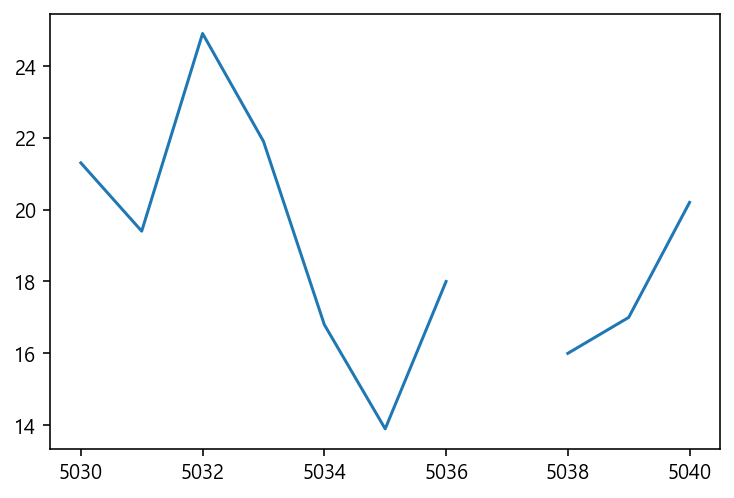

In [9]:
plt.plot(df_train.loc[5030:5040, '최고기온'])

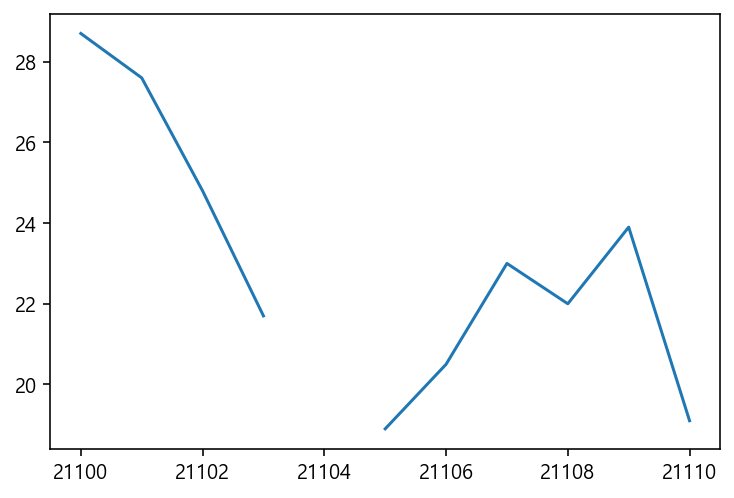

In [10]:
plt.plot(df_train.loc[21100:21110, '최고기온'])

In [11]:
df_train['최고기온'].interpolate(method='linear', inplace=True)

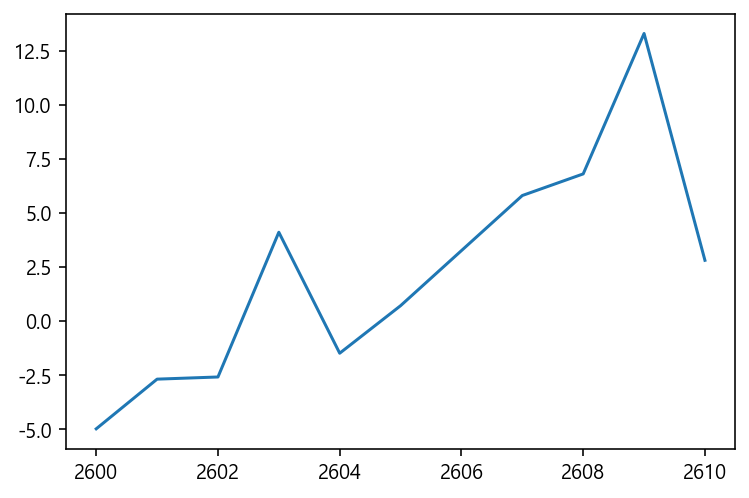

In [12]:
plt.plot(df_train.loc[2600:2610, '최고기온'])

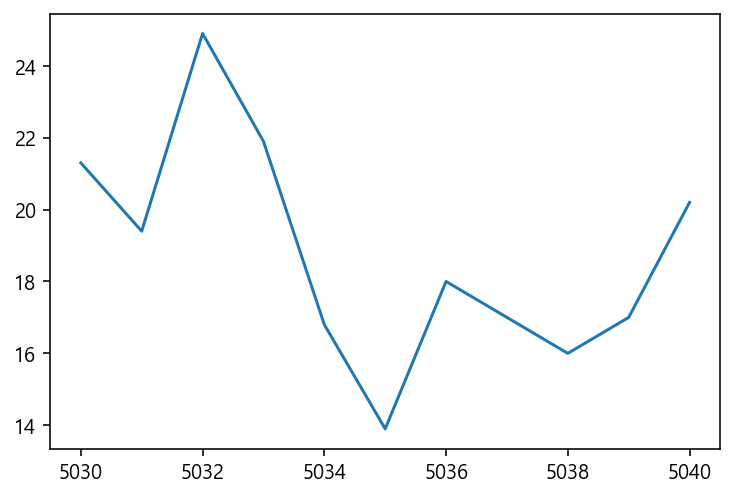

In [13]:
plt.plot(df_train.loc[5030:5040, '최고기온'])

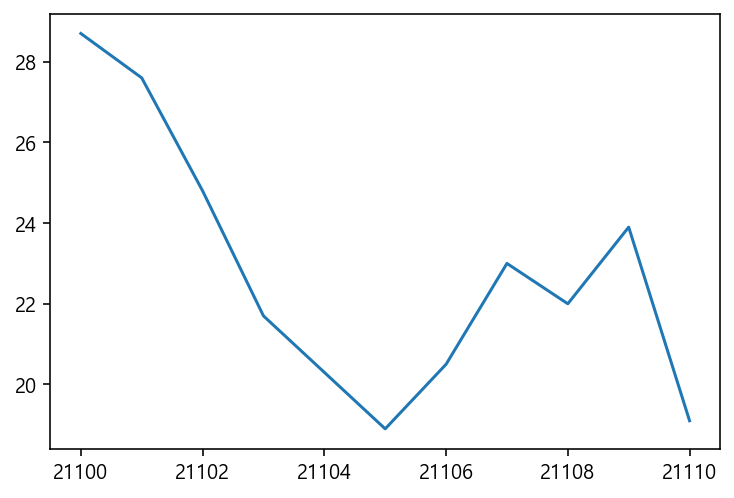

In [14]:
plt.plot(df_train.loc[21100:21110, '최고기온'])

# 최저기온
    - 선형 보간법으로 NAN값 처리

In [15]:
df_train[df_train['최저기온'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2606,1967-02-19,3.25,NaN,NaN,NaN,62.0,1.8,9.5,NaN,93.1,-1.7
5037,1973-10-16,17.00,NaN,NaN,0.4,74.0,1.8,3.5,9.24,29.7,12.3
22865,2022-08-08,28.40,NaN,NaN,129.6,91.6,3.3,NaN,NaN,0.0,26.8


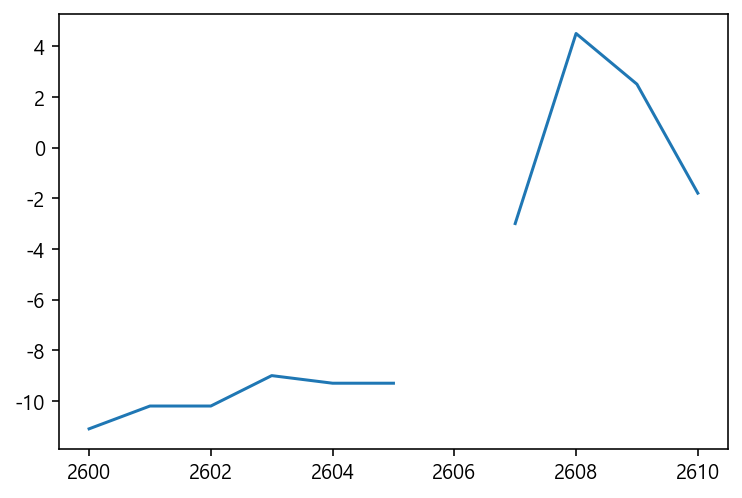

In [16]:
plt.plot(df_train.loc[2600:2610, '최저기온'])

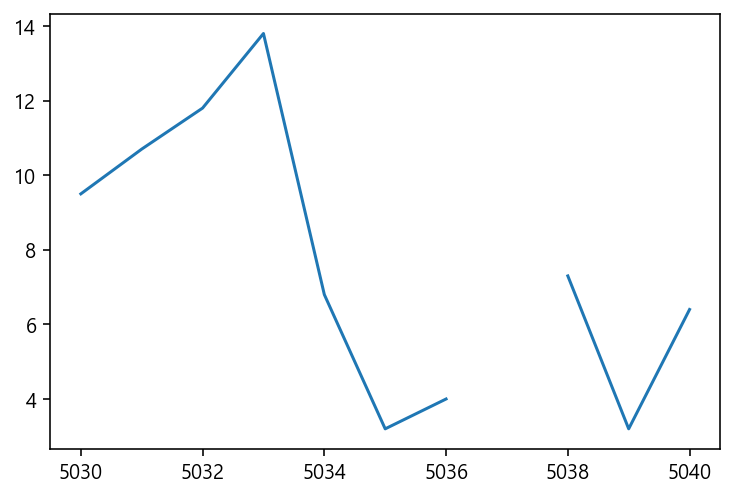

In [17]:
plt.plot(df_train.loc[5030:5040, '최저기온'])

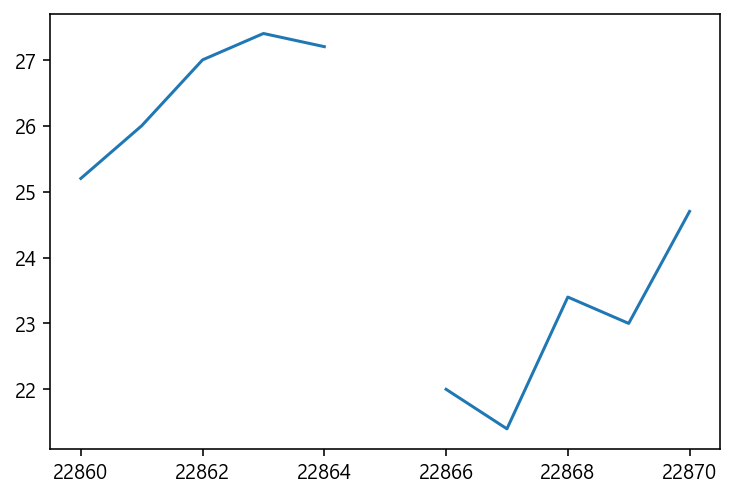

In [18]:
plt.plot(df_train.loc[22860:22870, '최저기온'])

In [19]:
df_train['최저기온'].interpolate(method='linear', inplace=True)

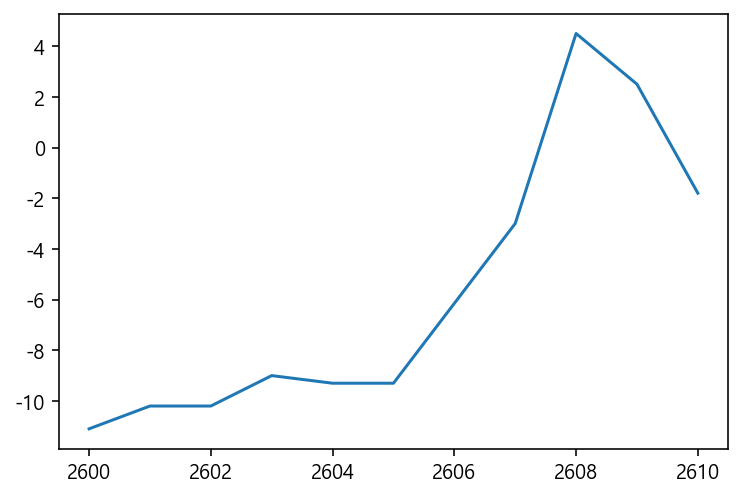

In [20]:
plt.plot(df_train.loc[2600:2610, '최저기온'])

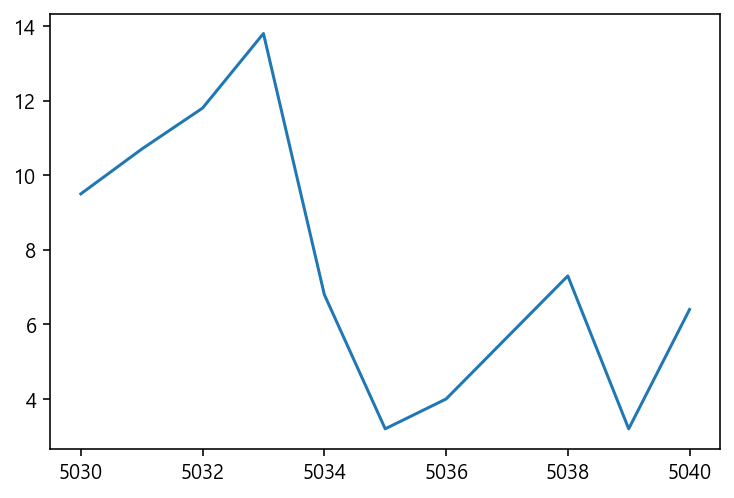

In [21]:
plt.plot(df_train.loc[5030:5040, '최저기온'])

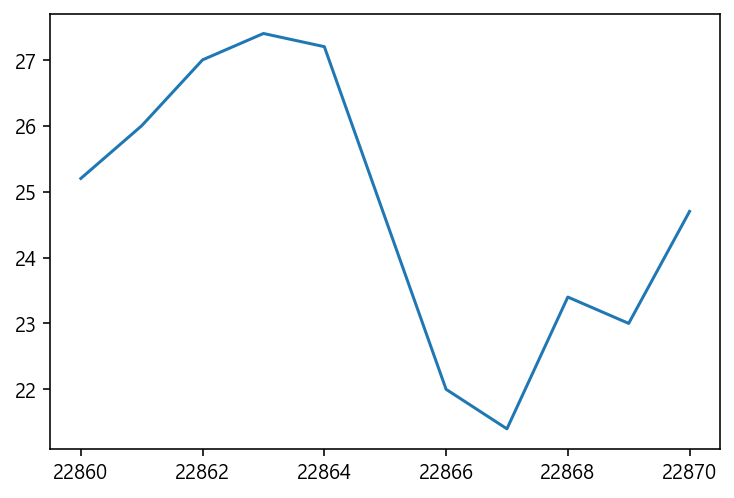

In [22]:
plt.plot(df_train.loc[22860:22870, '최저기온'])

# 일교차
    - 최고기온과 최저기온을 먼저 NAN값 처리를 하였기에
    - 일교차 = 최고기온 - 최저기온으로 처리

In [23]:
nan_index = df_train[df_train['일교차'].isnull()].index.tolist()

In [24]:
df_train.loc[nan_index, '일교차'] = df_train.loc[nan_index,
                                              '최고기온'] - df_train.loc[nan_index, '최저기온']

In [25]:
df_train['일교차'].isnull().sum()

0

# 강수량
    - NAN값이 너무 많다. -> 삭제하면 데이터가 많이 줄어듬
    - 강수량은 선형 보간법 X
    - 생각
        1. 모든 NAN값 0으로 대체
        2. NAN값 앞, 뒤 날짜 2개의 값이 0과 NAN값이 아닌경우 두 날짜 평균값으로 대체 [ 선택 ]

In [26]:
df_train['강수량'].head()

0    NaN
1    0.4
2    0.0
3    0.0
4    NaN
Name: 강수량, dtype: float64

In [27]:
df_train.loc[0, '강수량'] = 0

In [28]:
nan_col = df_train[df_train['강수량'].isnull()].index.tolist()

In [29]:
for i in nan_col:
    if df_train.loc[i-1, '강수량'] != 0:
        if df_train.loc[i+1, '강수량'] != 0 and (i+1) not in nan_col:
            df_train.loc[i, '강수량'] = (
                df_train.loc[i-1, '강수량'] + df_train.loc[i+1, '강수량']) / 2
        else:
            df_train.loc[i, '강수량'] = 0
    else:
        df_train.loc[i, '강수량'] = 0

In [30]:
df_train['강수량'].isnull().sum()

0

# 평균습도

In [31]:
df_train['평균습도']

0        68.3
1        87.7
2        81.3
3        79.7
4        44.0
         ... 
23006    69.8
23007    58.1
23008    56.3
23009    65.6
23010    65.5
Name: 평균습도, Length: 23011, dtype: float64

# 평균풍속

In [32]:
nan_col = df_train[df_train['평균풍속'].isnull()].index.tolist()

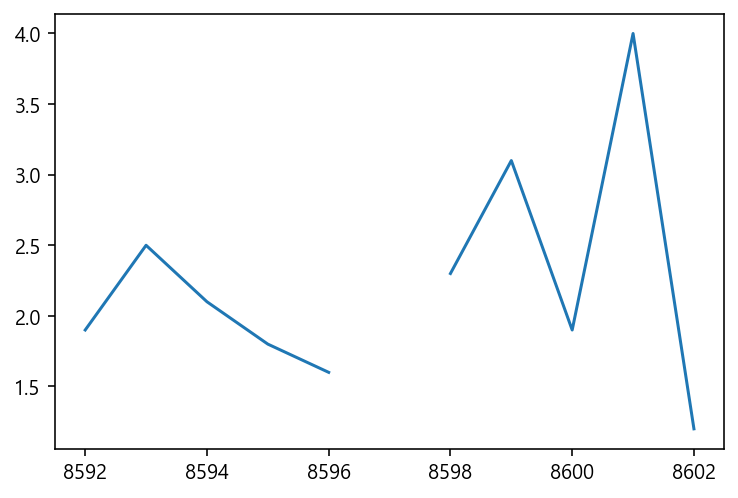

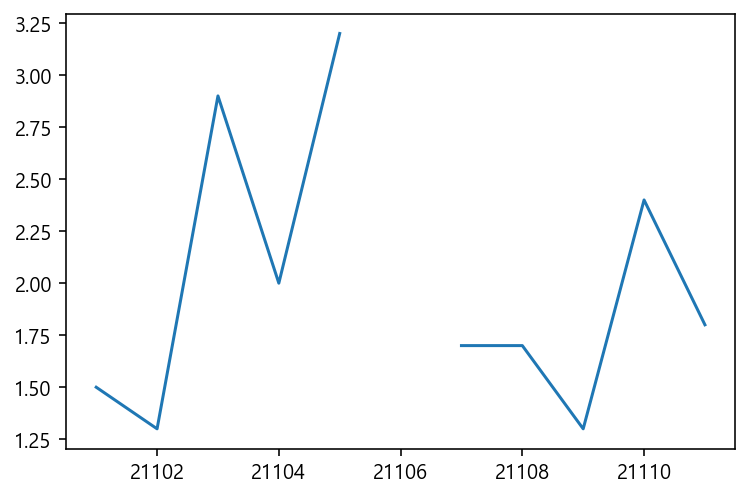

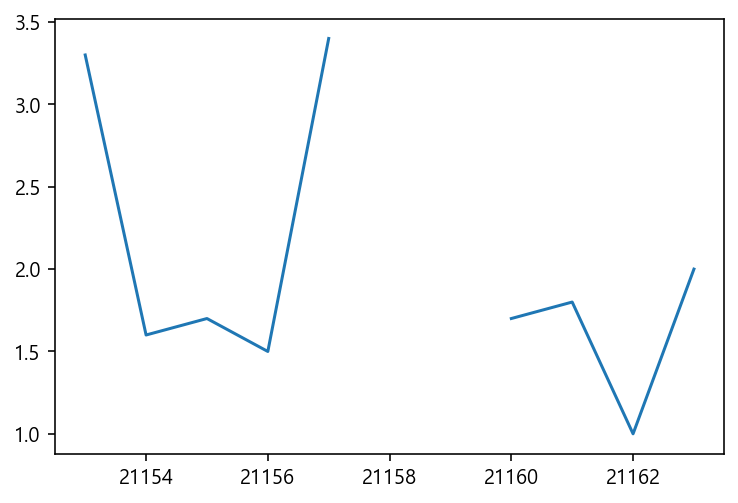

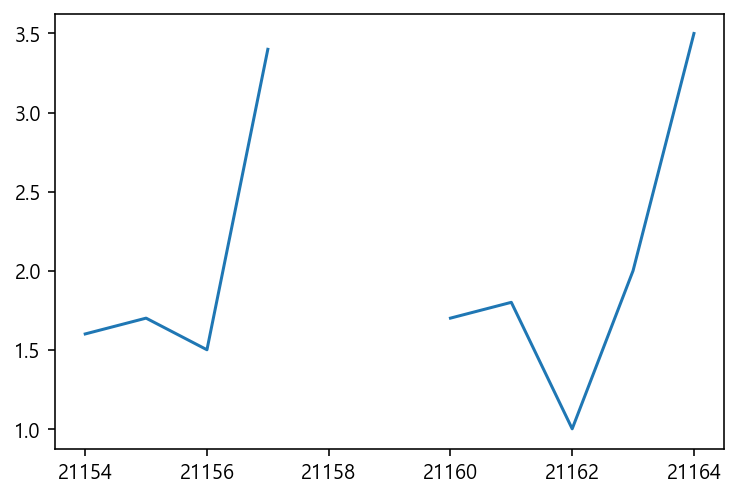

In [33]:
for i in nan_col:
    plt.plot(df_train.loc[i-5:i+5, '평균풍속'])
    plt.show()

In [34]:
df_train['평균풍속'].interpolate(method='linear', inplace=True)

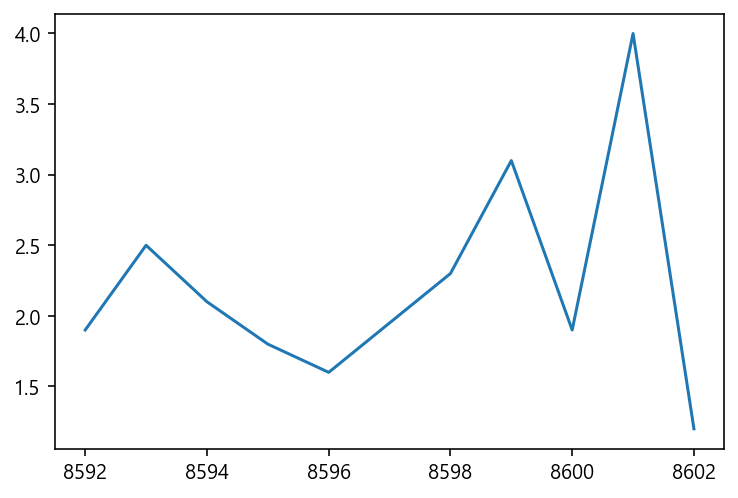

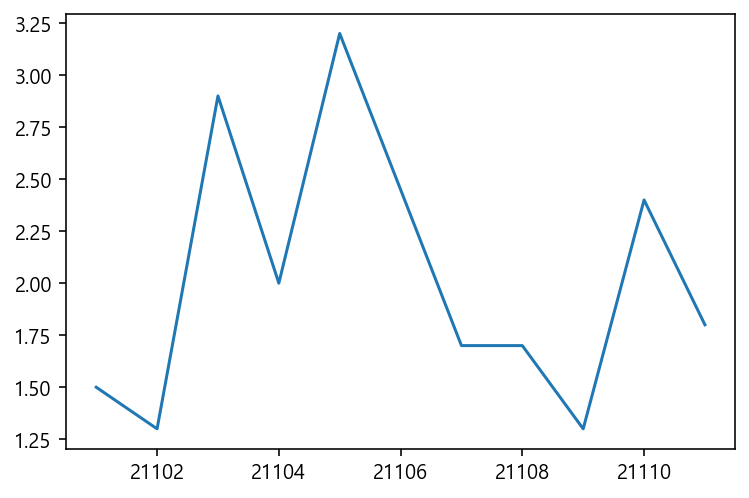

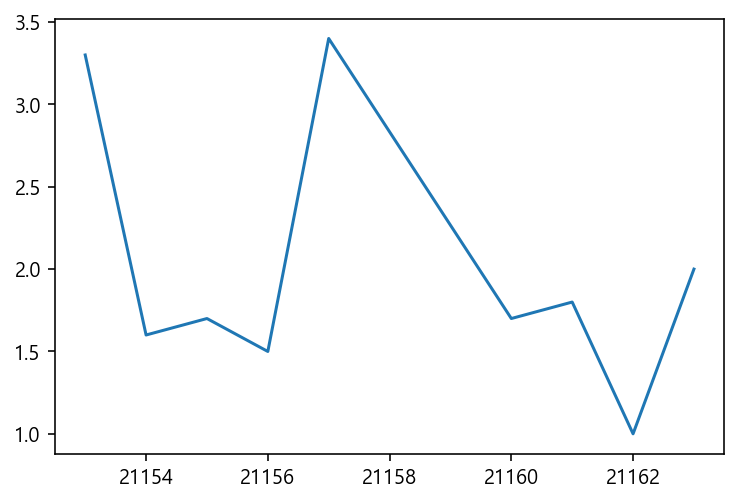

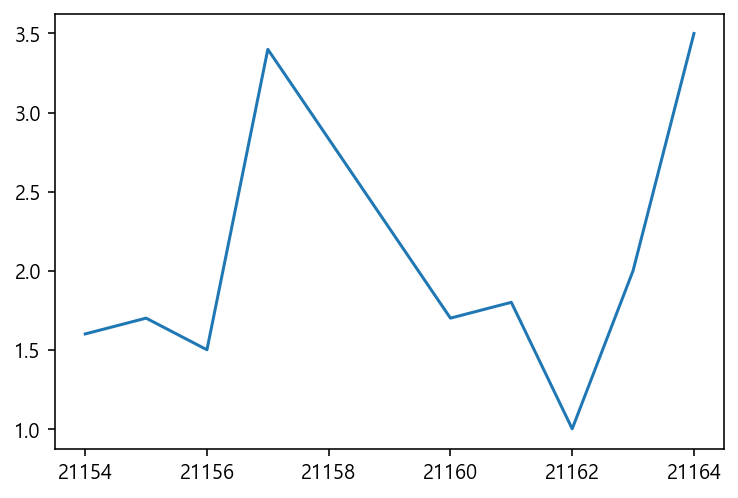

In [35]:
for i in nan_col:
    plt.plot(df_train.loc[i-5:i+5, '평균풍속'])
    plt.show()

# 일조합
    - 일사시간(구름이나 안개 따위에 가려지지 아니하고 햇볕이 실제로 내리쬐는 시간)의 합계

In [36]:
nan_col = df_train[df_train['일조합'].isnull()].index.tolist()

In [37]:
df_train['일조합'].interpolate(method='linear', inplace=True)

# 일사합, 일조율
    # 일사합
        - 일사량(태양의 복사 에너지가 땅에 닿는 양)의 합계
    # 일조율
        - 해가 떠 있는 시간에 대한 실지 햇볕이 내리쬔 시간의 비율.

In [38]:
df_train['연'] = df_train['일시'].str.split('-', expand=True)[0]
df_train['월'] = df_train['일시'].str.split('-', expand=True)[1]

In [39]:
result = df_train.groupby(['연', '월']).mean().reset_index()

result = result.fillna(result.mean())

In [40]:
result

,연,월,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960,01,0.596774,-7.580645,8.177419,0.148387,63.200000,2.254839,4.835484,11.933000,48.699342,-3.316129
1,1960,02,6.355172,-2.696552,9.051724,0.137931,64.372414,2.482759,5.837931,11.933000,48.699342,1.741379
2,1960,03,11.980645,1.925806,10.054839,3.691935,64.970968,2.445161,5.883871,11.933000,48.699342,6.667742
3,1960,04,16.710000,5.450000,11.260000,0.780000,59.073333,2.780000,8.013333,11.933000,48.699342,10.570000
4,1960,05,21.896774,11.925806,9.970968,4.619355,63.777419,2.693548,6.825806,11.933000,48.699342,16.535484
...,...,...,...,...,...,...,...,...,...,...,...,...
751,2022,08,28.870968,23.106452,5.764516,19.600000,80.170968,2.293548,3.761290,13.427000,27.745161,25.741935
752,2022,09,27.243333,18.150000,9.093333,6.716667,68.090000,2.363333,6.796667,16.540667,54.846667,22.353333
753,2022,10,19.677419,10.267742,9.409677,4.003226,68.887097,2.151613,6.967742,13.555484,62.622581,14.564516
754,2022,11,15.430000,5.573333,9.856667,2.816667,64.390000,2.110000,6.250000,9.959000,61.336667,10.030000


(array([4568., 1305., 1311., 1351., 1515., 1775., 2309., 2692., 4070.,
        1749.]),
 array([ 0.  ,  9.69, 19.38, 29.07, 38.76, 48.45, 58.14, 67.83, 77.52,
        87.21, 96.9 ]),
 <BarContainer object of 10 artists>)

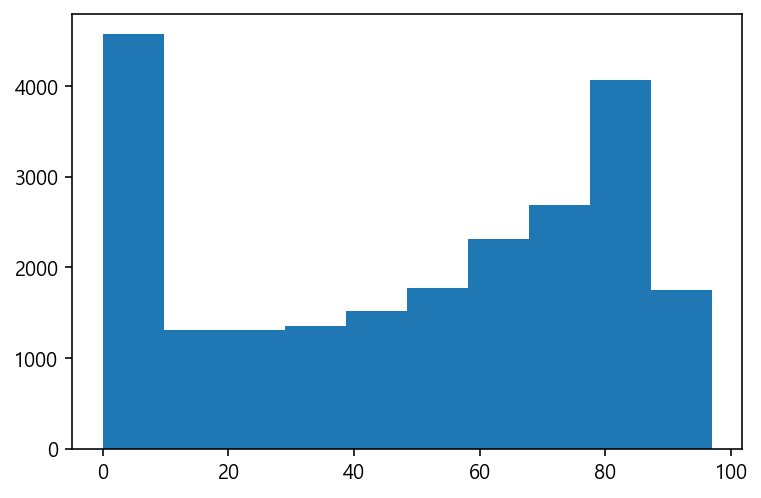

In [41]:
plt.hist(df_train['일조율'])

(array([1642., 2610., 3559., 3201., 2683., 2136., 1482.,  654.,  175.,
           7.]),
 array([ 0.   ,  3.348,  6.696, 10.044, 13.392, 16.74 , 20.088, 23.436,
        26.784, 30.132, 33.48 ]),
 <BarContainer object of 10 artists>)

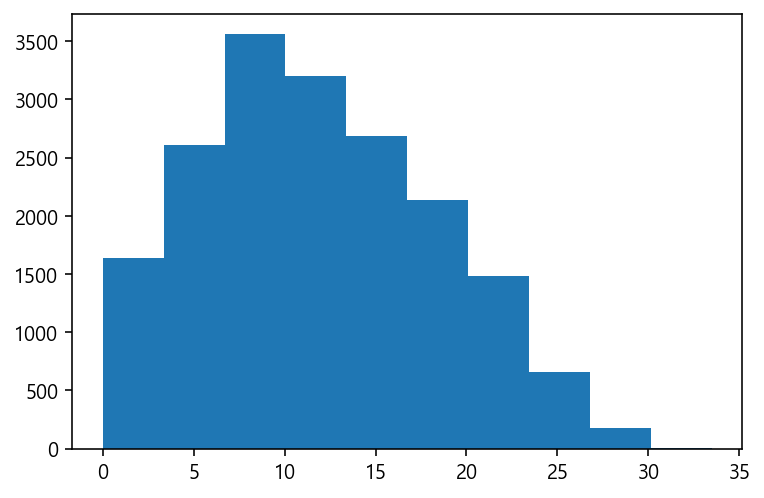

In [42]:
plt.hist(df_train['일사합'])

In [43]:
df_train.fillna(result, inplace=True)

(array([4568., 1312., 1333., 1398., 1598., 1912., 2371., 2700., 4070.,
        1749.]),
 array([ 0.  ,  9.69, 19.38, 29.07, 38.76, 48.45, 58.14, 67.83, 77.52,
        87.21, 96.9 ]),
 <BarContainer object of 10 artists>)

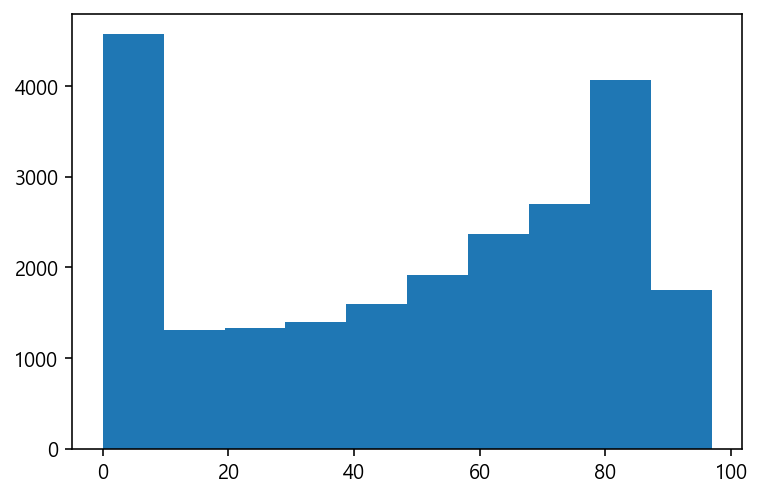

In [44]:
plt.hist(df_train['일조율'])

(array([1646., 2663., 3701., 3534., 2833., 2201., 1490.,  655.,  175.,
           7.]),
 array([ 0.   ,  3.348,  6.696, 10.044, 13.392, 16.74 , 20.088, 23.436,
        26.784, 30.132, 33.48 ]),
 <BarContainer object of 10 artists>)

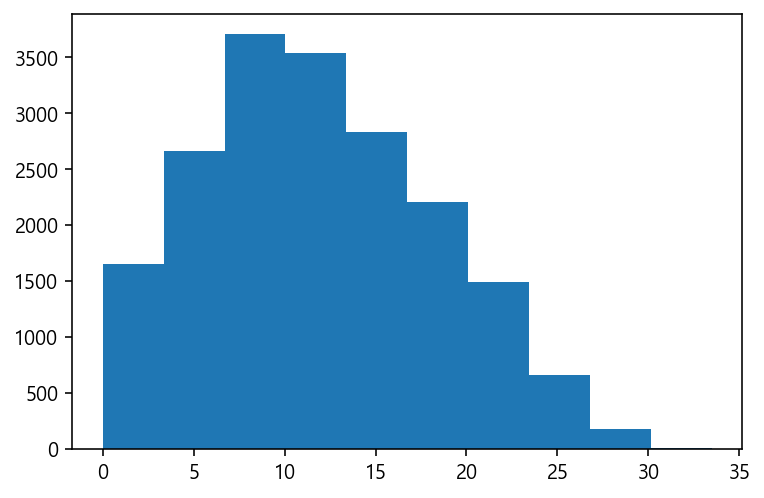

In [45]:
plt.hist(df_train['일사합'])

In [46]:
df_train.isnull().sum()

일시         0
최고기온       0
최저기온       0
일교차        0
강수량        0
평균습도       0
평균풍속       0
일조합        0
일사합     4106
일조율        0
평균기온       0
연          0
월          0
dtype: int64

In [47]:
result = df_train.groupby(['월']).mean().reset_index()

result = result.fillna(result.mean())

In [48]:
result

,월,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,01,1.432770,-6.316078,7.748848,0.683129,60.268203,2.437276,5.416155,7.657076,54.386726,-2.694572
1,02,4.309972,-3.978343,8.288315,0.975225,59.105955,2.639494,5.996507,10.147214,55.183363,-0.158315
2,03,10.403840,1.248797,9.155044,1.523323,59.056784,2.817051,6.522026,12.964909,54.119226,5.414593
3,04,17.661534,7.511587,10.149947,2.893122,57.918254,2.850106,6.928201,15.642492,52.293564,12.221587
4,05,23.263850,13.031746,10.232104,3.348643,62.080338,2.555351,7.299565,17.253470,51.288529,17.809575
5,06,27.070847,18.046931,9.023915,4.859048,69.113545,2.240265,6.285661,16.123418,42.786353,22.108519
6,07,28.875525,22.069278,6.806247,13.177803,78.629032,2.266078,4.066231,12.443989,27.950009,25.067127
7,08,29.768152,22.560983,7.207168,10.964977,76.152791,2.165028,4.942217,12.876895,36.181797,25.737839
8,09,25.879471,17.148413,8.731058,5.487751,69.528624,1.989048,5.997672,12.775654,48.438319,21.159206
9,10,19.968510,10.077240,9.891270,1.781567,64.750998,1.993932,6.639683,11.011382,58.774865,14.674194


In [49]:
nan_col = df_train[df_train['일사합'].isnull()].index.tolist()

In [50]:
for i in nan_col:
    m = np.int8(df_train.loc[i, '월'])
    df_train.loc[i, '일사합'] = result.loc[m-1, '일사합']

In [51]:
df_train.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
연       0
월       0
dtype: int64

In [52]:
df_train.drop(columns=['연', '월'], axis=1, inplace=True)

# 저장

In [53]:
df_train.to_csv("../data/preprocessed/df_train001.csv",
                index=False, encoding='utf-8')